In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

plt.rcParams['font.size'] = 16

## Example 1: $f(x)=\sin x$

In [2]:
# 1. Gerar dados de treinamento
np.random.seed(42)
num_samples = 200
data_train = np.random.uniform(0, 2 * np.pi, num_samples).reshape(-1, 1)
sin_values_train = np.sin(data_train)

# Adiciona ruído para simular dados reais
noise = np.random.normal(0, 0.1, sin_values_train.shape)
sin_values_train += noise

# 2. Criar o modelo FCNN com TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(5, activation='tanh'),
    tf.keras.layers.Dense(1)
])

# 3. Compilar o modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mse')

# 4. Treinar o modelo
model.fit(data_train, sin_values_train, epochs=500, verbose=0)

# 5. Gerar dados de teste
num_test_samples = 100
data_test = np.linspace(0, 4 * np.pi, num_test_samples).reshape(-1, 1)
sin_values_true = np.sin(data_test)

# 6. Fazer previsões
sin_values_predicted = model.predict(data_test)

# 7. Calcular o erro quadrático médio manualmente
mse = np.mean(np.square(sin_values_true - sin_values_predicted))
print(f"Mean Squared Error on Test Data: {mse}")

c:\Users\pf010\AppData\Local\miniconda3\envs\tensorflow-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Mean Squared Error on Test Data: 0.4295104062167091
Mean Squared Error on Test Data: 0.4295104062167091


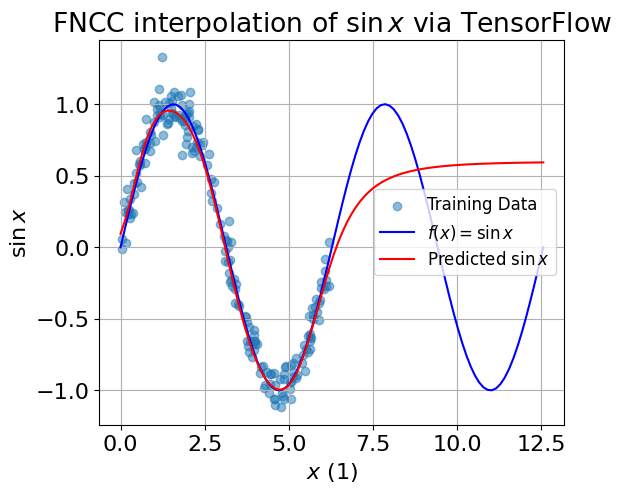

In [3]:
# 8. Visualizar os resultados
plt.figure(figsize=(6, 5))
plt.scatter(data_train, sin_values_train, label='Training Data', alpha=0.5)
plt.plot(data_test, sin_values_true, label=r'$f(x)=\sin x$', color='blue')
plt.plot(data_test, sin_values_predicted, label=r'Predicted $\sin x$', color='red')
plt.xlabel(r'$x$ (1)')
plt.ylabel(r'$\sin x$')
plt.title(r'FNCC interpolation of $\sin x$ via TensorFlow')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

## Example 2: $f(x)=e^{-x^2}$

In [ ]:
# 1. Gerar dados de treinamento
np.random.seed(42)
num_samples = 1000
data_train = np.random.uniform(-10, 10, num_samples).reshape(-1, 1)
gauss_values_train = np.exp(-np.square(data_train))

# Adiciona ruído para simular dados reais
noise = np.random.normal(0, 0.01, gauss_values_train.shape)
gauss_values_train += noise

# 2. Criar o modelo FCNN com TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 3. Compilar o modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse')

# 4. Treinar o modelo
model.fit(data_train, gauss_values_train, epochs=500, verbose=0)

# 5. Gerar dados de teste
num_test_samples = 50
data_test = np.linspace(-15, 15, num_test_samples).reshape(-1, 1)
gauss_values_true = np.exp(-np.square(data_test))

# 6. Fazer previsões
gauss_values_predicted = model.predict(data_test)

# 7. Calcular o erro quadrático médio manualmente
mse = np.mean(np.square(gauss_values_true - gauss_values_predicted))
print(f"Mean Squared Error on Test Data: {mse}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Mean Squared Error on Test Data: 7.256248228283853e-05


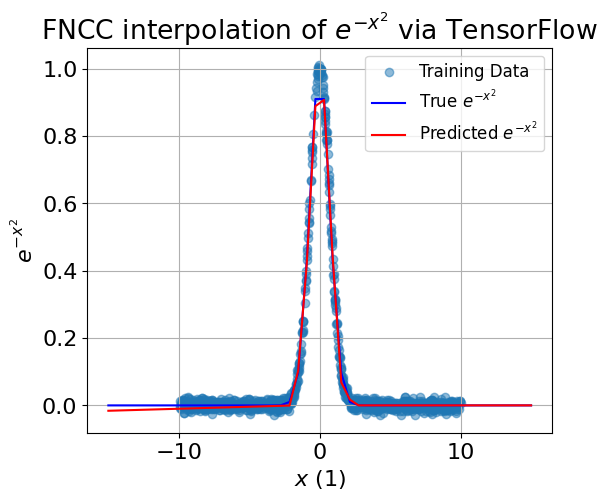

In [ ]:
# 8. Visualizar os resultados
plt.figure(figsize=(6, 5))
plt.scatter(data_train, gauss_values_train, label='Training Data', alpha=0.5)
plt.plot(data_test, gauss_values_true, label=r'True $e^{-x^2}$', color='blue')
plt.plot(data_test, gauss_values_predicted, label=r'Predicted $e^{-x^2}$', color='red')
plt.xlabel(r'$x$ (1)')
plt.ylabel(r'$e^{-x^2}$')
plt.title(r'FNCC interpolation of $e^{-x^2}$ via TensorFlow')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()